## Labo Week 4 : KNN

__Oefening 1__ Kennismaking met K-NN classificatie

Gegeven volgende beperkte datset :

|     naam    | zoetheid |  krokantheid  |   soort  |
|-------------|:--------:|:-------------:|---------:|
| pompelmoes  |    6     |      5        | fruit    |
| groene boon |    3     |      7        | groente  |
|    ui     |    3     |      6        | groente |
|  appelsien  |    7     |      3        | fruit    |
|  jona gold  |    6     |      6        | fruit    |
|  granny smith  |    4     |      7       | fruit    |
|  paprika  |    5     |      6        | groente    |
|  pompoen  |    4     |      2        | groente    |
|  mango  |    9     |      3        | fruit    |
|  framboos  |    4     |      1        | fruit    |

We wensen nu voor 2 onbekende ingredienten te beslissen tot welke categorie ze behoren : _fruit of groente_ . Deze ingredienten zijn :

|  naam     | zoetheid |  krokantheid  |   soort  |
|-----------|:--------:|:-------------:|---------:|
|  tomaat   |     6    |       4       |     ?    |
|  wortel   |     4    |       9       |     ?    |

Gebruik K-NN om deze classificatie te doen. 

**1.1** Doe dit eerst visueel voor $k =  1$ : m.a.w. plot de trainings- en test data in het vlak en bepaal visueel de classificatie. Geef dezelfde kleur aan data uit dezelfde klasse.

**1.2** Gebruik vervolgens de KNeighborsClassifier van module sklearn om de voorspellingen te doen. Doe dit eerst voor $k=1$ daarna voor $k=3,k=5$ en tenslotte $k= 7$. Kan je deze classificaties logisch verklaren?


#### KNN

**1.1** Doe dit eerst visueel voor $k =  1$ : m.a.w. plot de trainings- en test data in het vlak en bepaal visueel de classificatie. Geef dezelfde kleur aan data uit dezelfde klasse.



In [29]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('trainingdata.csv')
testData = pd.read_csv('testData.csv')



X_train = data[['zoetheid','krokantheid']]
Y_train = [data.soort.iloc[i] for i in data.index]

X_test = testData[['zoetheid','krokantheid']]


In [30]:
colors = data['soort'].map({'groente': "green", 'fruit': "blue", '?': "red"})


#plt.scatter(X_train,Y_train)
#plt.show()

**1.2** Gebruik vervolgens de KNeighborsClassifier van module sklearn om de voorspellingen te doen. Doe dit eerst voor $k=1$ daarna voor $k=3,k=5$ en tenslotte $k= 7$. Kan je deze classificaties logisch verklaren?

In [31]:
from sklearn.neighbors import KNeighborsClassifier
for x in 1,3,5,7:
    knn = KNeighborsClassifier(n_neighbors=x)
    knn.fit(X_train,Y_train)
    prediction = knn.predict(X_test)
    print(x)
    print(prediction)

1
['fruit' 'fruit']
3
['fruit' 'groente']
5
['fruit' 'groente']
7
['fruit' 'fruit']


__Oefening 2__ Afstandsmaten

Het KNN algoritme steunt op het berekenen van afstanden tussen datapunten om dichte buren te kunnen bepalen. Er zijn echter verschillende keuzes die je kan maken om afstanden te berekenen.
De meest voorkomende afstandsmaten die gebruikt worden in data science zijn :

    * De Euclidische afstandsmaat (Minkowski met p=2)
    * De Manhattan afstandsmaat (Minkowski met p=1)
    * De cosinus similarity
    * Chebyshev
    
**2.1** Bereken in het voorbeeld van hierboven de afstand van de twee testdatapunten (tomaat en wortel) t.o.v. alle andere datapunten in de dataset. Dit is wat de KNeighborsClassifier achter de schermen ook doet. Je kan de afstandsmaten vinden in de module `scipy.spatial.distance` zie ook : <https://docs.scipy.org/doc/scipy/reference/spatial.distance.html>
Doe dit voor de 4 opgegeven afstandsmaten en neem de resultaten telkens op in een aparte pandas dataframe zoals hier voor de euclidische afstandsmaat :


 
 | euclidean    | tomaat |  wortel | |         
 |-------------|:------:|:-------:|    |        
 |  pompelmoes |   ?     |     ?   | |          
 | groene boon |   ?     |   ?     | |          
 |    ui     |     ?   |     ?    |   |         
 |  appelsien  |     ?   |   ?      | |         
 |  jona gold  |     ?   |   ?      |  |      
 |  granny smith |     ?   |   ?      |  |      
 |  paprika |     ?   |   ?      |   |          
 |  pompoen |     ?   |   ?      | |          
 |  mango |     ?   |   ?      |   |         
  | framboos |     ?   |   ?      |  |         
 



**2.2** Zou de classificatie anders gebeuren door het wijzigen van de afstandsmaat? Test dit eveneens door de metriek parmeter van de KNeighborsClassifier anders in te stellen.

    

In [32]:
import scipy.spatial.distance as dist

training_values = data.iloc[:,1:3].values
test_values = testData.iloc[:,1:3].values



#print( training_values,test_values)

euclidean = pd.DataFrame(dist.cdist(training_values,test_values,metric= 'euclidean'),columns =('tomaat','wortel'),index= data.index)
euclidean.index.name = 'euclidean'
print(euclidean)

print("\n")

cosinus = pd.DataFrame(dist.cdist(training_values,test_values,metric= 'cosine'),columns =('tomaat','wortel'),index= data.index)
cosinus.index.name = 'cosine'
#print(cosinus)

print("\n")
minikowski2 = pd.DataFrame(dist.cdist(training_values,test_values,metric= 'chebyshev'),columns =('tomaat','wortel'),index= data.index)
minikowski2.index.name = 'chebyshev'
#print(minikowski2)

minikowski1 = pd.DataFrame(dist.cdist(training_values,test_values,metric= 'minkowski'),columns =('tomaat','wortel'),index= data.index)
minikowski1.index.name = 'manhattan'
#print(minikowski1)

###https://cs231n.github.io/python-numpy-tutorial/
#https://numpy.org/doc/stable/reference/
#https://pandas.pydata.org/docs/reference/series.html
#https://scikit-learn.org/stable/modules/classes.html
#https://matplotlib.org/stable/api/index.html

             tomaat    wortel
euclidean                    
0          1.000000  4.472136
1          4.242641  2.236068
2          3.605551  3.162278
3          1.414214  6.708204
4          2.000000  3.605551
5          3.605551  2.000000
6          2.236068  3.162278
7          2.828427  7.000000
8          3.162278  7.810250
9          3.605551  8.000000






__Oefening 3__ train-test-split

Om je leermodel op een onafhankelijke manier te kunnen evalueren moet je ervoor zorgen dat je dit model test op data die het niet gebruikt heeft om te leren. De methode `train_test_split` uit de module `sklearn.model_selection` kan hier handig voor gebruikt worden.

**3.1** Genereer eerst je data **X** als een 2dim numpy array met hierin 12 rijen en 2 kolommen. Als data elementen voorzie je gewoon de getallen 1 t.e.m. 25.

Genereer nu ook je labels **Y** als een numpy array van dim 1 met lengte 12. De data elementen van deze array zijn hier de classificatielabels 0 of 1, willekeurig gekozen. (Maak bijvoorbeeld gebruik van `np.random.randint`)

**3.2** Split nu je data via de `train_test_split` methode en vang de 4 resultaten op. Doe dit op volgende manieren :
    
    * zonder parameterinstellingen. Herhaal de oproep enkele keren. Ga telkens na hoe je 4 resultaten eruit zien.
    * stel nu een randomstate in en herhaal opnieuw enkele oproepen. Varieer ook met de waarde van randomstate zelf.
    * stel zelf de groote van de training en/of test set in. Dit kan absoluut of procentueel.
    * Wat is het effect van de parameter shuffle = False ?
    * wat is het effect van de parameter stratify ?


**3.1** Genereer eerst je data **X** als een 2dim numpy array met hierin 12 rijen en 2 kolommen. Als data elementen voorzie je gewoon de getallen 1 t.e.m. 25.

Genereer nu ook je labels **Y** als een numpy array van dim 1 met lengte 12. De data elementen van deze array zijn hier de classificatielabels 0 of 1, willekeurig gekozen. (Maak bijvoorbeeld gebruik van `np.random.randint`)

In [33]:
from sklearn.model_selection import train_test_split
import numpy as np
X = np.random.randint(26, size=(12, 2))
Y = np.random.randint(2, size=12)

X_trainData, X_testData, Y_trainData, Y_testData = train_test_split(X, Y, random_state= 55, shuffle= False)

print("X_train shape:", X_trainData.shape)
print("Y_train shape:", Y_trainData.shape)

X_train shape: (9, 2)
Y_train shape: (9,)


**Oefening 4**  K-NN regressie met sklearn

**4.1** Lees het bestanden _auto.csv_ in als een dataframe. Ga na wat deze data precies inhoudt en hoe omvangrijk ze is. 

De bedoeling is dat je een leermodel opstelt om te voorspellen hoeveel het verbuik is van de wagen (in miles /gallon) gegeven de afgelegde weg (in miles) en de pk waarden van de wagen.

**4.2** Maak gebruik van de $train\_test\_split$ methode om je data op te splitsen in training versus test data. Neem 30% van de data als testdata, 70% van de data als trainingsdata.

**4.3** Ga eerst na wat in dit geval een goede waarde voor $k$ zou zijn. Gebruik   
  hiervoor de Elbow-methode. Als error bereken je de _mean-squared_error (mse)_  voor elke k-waarde die je test. Plot de _elbow_ uit in een grafiek (m.a.w. voor elke geteste k de bijbehorende $mse$). De $k-waarden$ neem je oneven als volgt :
  ```
  k_waarden = np.arrange(1,20,2)
  ```
  De $mse$ is het gemiddelde van het verschil van de kwadraten tussen elke voorspelde waarde en zijn werkelijke waarde :
  
  \begin{equation}
  mse = \frac{1}{len(testset)} \sum_i (y_{i\;predicted} - y_{i\;expected})^2
  \end{equation}
  Gelukkig kan python die ook gewoon voor je berekenen : nl. via de $mean\_squared\_error$ methode uit : $sklearn.metrics$

Test zeker ook uit wat het effect is van de parameter $random\_state$ in je oproep van de $train\_test\_split$ methode die je hierboven gebruikte om je testset te genrereren.

**4.4** Werk nu verder met de $k$-waarde die een minimale error geeft in je grafiek. Train je model en bereken de accuracy en de mse op je test set. Maak een plot waarbij je voor de test data de voorspelde en werkelijke mpg waarde uitplot. Neem als waarde voor de X-as gewoon de range(1,119) een nummering over het aantal elementen uit je test set.



**4.1** Lees het bestanden _auto.csv_ in als een dataframe. Ga na wat deze data precies inhoudt en hoe omvangrijk ze is. 

De bedoeling is dat je een leermodel opstelt om te voorspellen hoeveel het verbuik is van de wagen (in miles /gallon) gegeven de afgelegde weg (in miles) en de pk waarden van de wagen.

In [34]:
dataVier= pd.read_csv('auto.csv')
print(dataVier.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   displacement  392 non-null    float64
 1   horsepower    392 non-null    int64  
 2   mpg           392 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 9.3 KB
None


**4.2** Maak gebruik van de $train\_test\_split$ methode om je data op te splitsen in training versus test data. Neem 30% van de data als testdata, 70% van de data als trainingsdata.

In [35]:
X_trainDataVier, X_testDataVier, Y_trainDataVier, Y_testDataVier = train_test_split(dataVier[['displacement','horsepower']], dataVier['mpg'], test_size=0.3, random_state=42)
print("X_train shape:", X_trainDataVier.shape)
print("y_train shape:", Y_trainDataVier.shape)

X_train shape: (274, 2)
y_train shape: (274,)


**4.3** Ga eerst na wat in dit geval een goede waarde voor $k$ zou zijn. Gebruik   
  hiervoor de Elbow-methode. Als error bereken je de _mean-squared_error (mse)_  voor elke k-waarde die je test. Plot de _elbow_ uit in een grafiek (m.a.w. voor elke geteste k de bijbehorende $mse$). De $k-waarden$ neem je oneven als volgt :
  ```
  k_waarden = np.arrange(1,20,2)
  ```
  De $mse$ is het gemiddelde van het verschil van de kwadraten tussen elke voorspelde waarde en zijn werkelijke waarde :
  
  \begin{equation}
  mse = \frac{1}{len(testset)} \sum_i (y_{i\;predicted} - y_{i\;expected})^2
  \end{equation}
  Gelukkig kan python die ook gewoon voor je berekenen : nl. via de $mean\_squared\_error$ methode uit : $sklearn.metrics$

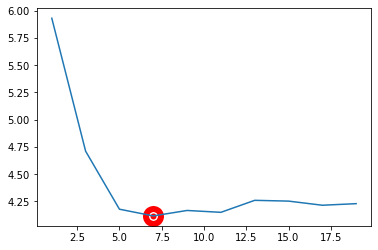

sweet spot
 7


In [36]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error 
from math import sqrt

k_waarden = np.arange(1,20,2)
rmse_val = [] #to store rmse values for different k
for k in k_waarden:
    model = KNeighborsRegressor(n_neighbors = k)
    model.fit(X_trainDataVier, Y_trainDataVier)  #fit the model
    pred=model.predict(X_testDataVier) #make prediction on test set
    error = sqrt(mean_squared_error(Y_testDataVier,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values


# spot
plt.scatter(k_waarden[np.argmin(rmse_val)], min(rmse_val) ,color = 'red', linewidths= 15)
plt.plot(k_waarden,rmse_val)
plt.show()

k = k_waarden[np.argmin(rmse_val)]
print("sweet spot\n", k)



**4.4** Werk nu verder met de $k$-waarde die een minimale error geeft in je grafiek. Train je model en bereken de accuracy en de mse op je test set. Maak een plot waarbij je voor de test data de voorspelde en werkelijke mpg waarde uitplot. Neem als waarde voor de X-as gewoon de range(1,119) een nummering over het aantal elementen uit je test set.

In [37]:
model = K

NameError: name 'K' is not defined